<h1 style="margin-bottom:0"><center>DI 501 - Introduction to Data Informatics</center></h1>
<h2 style="margin-top:0"><center>Assignment #4</center></h2>
<h3 style="margin-top:0"><center>Due: December 26, Sunday 23:59</center></h3>
<br>
<p style="margin-top:0"><center><b>This assignment is prepared for DI 501 - Introduction to Data Informatics course offered by  Middle East Technical University.</b></center></p>
<hr style="height:2px;color:navy;margin-top:0">
<p style="margin-top:0; text-align: justify; font-size:15px">The objectives of this assignment are:
    <li>You will be able to use standardization and normalization. </li>
    <li>You will be able to perform PCA.</li>
    <li>You will be able to perform classification algorithms.</li>
    
### Submission and Grading Policy ###
<p style="margin-top:0"><center><b></b></center></p>
  
- Submit your assignments to the corresponding assignment link in https://odtuclass.metu.edu.tr.
- Solutions should be submitted in a single **ipynb** file named: metu-username_HW_4.ipynb (e.g., “e123456_HW_4.ipynb”).
- Late submissions will be accepted by December 29, 2021, 23:59 with a 5% per day penalty.
- Do not change variable names in the code blocks and the texts in the markdowns.
- **<font color=#C91414>This is an individual assignment. Please do not collaborate. You have to adhere to the academic integrity principles.</font>** 
- If needed, you are required to explain your reasonings by adding new blocks below your codes.

<h3 style="margin-bottom:0">Import Libraries</h4>

Here, please import pyplot and seaborn libraries of Python. You may also import any other library that you intend to use here.

In [1]:
### answer ###
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

<h3 style="margin-bottom:0">1) Data (5 pts)</h3>

We will be utilizing a dataset that is used for classification. It is called music genre classification dataset. It consist of 16 explanatory variables and 1 target variable (class). In total it has about 18000 rows. 

Please import data with correct delimiter here and retrieve the first 5 rows. Then, you should drop the first two columns (artist name and track name).

In [2]:
### answer ###
df = pd.read_csv('./genre.csv', delimiter=',')
df.head(5)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


<h3 style="margin-bottom:0">2) Classification</h3>

For the following use mushroom data.

    a) Perform five fold cross validation. You are supposed to reserve one fold to a test dataset and the remaining is to a training and validation dataset.
    b) Apply 3 different types of classification algorithms that we have learned and used 2 different types of parameters. Explain how you selected the parameters. You will have 6 classification models. Considering all the folds, you will have a total of 30 models.
    c) Create a table that summarizes accuracy, recall and precision values for each of the 6 classifications. Which algorithm performs the best here? Compare their performances and comment on them.
    
    
    Notes:
    1) Please use standardization, normalization or a combination of them. Explain how you selected it.
    2) Your graphs should be reproducible. It means whenever I run your code, I should be able to get same numbers.
    3) Never use test dataset for model selection.
    4) For a 5-fold cross validation, you will have 5 models belonging to the same type of model with the same parameters (->a cla. Choose the best model configuration which produced the best overall result on the validation dataset. 

### Exploration

`Artist Name` and `Track Name` are text, so we won't use them to train our models.

In [3]:
df.drop(columns=['Artist Name', 'Track Name'], axis=1, inplace=True)
df.head(5)

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


The target variable is `Class` and it is a categorical variable with 11 values.

In [4]:
sorted(df['Class'].unique().tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [5]:
y_cols = df.columns[-1:].tolist()
x_cols = df.columns[:-1].tolist()
print(f'input variables {x_cols}')
print(f'target variable {y_cols}')

input variables ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature']
target variable ['Class']


Let's drop any row without target variable.

In [6]:
df.dropna(how='any', axis=0, subset=y_cols, inplace=True)

Let's check some useful characteristics of the variables with `describe` method of pandas. We'll also check number of unique and missing values for each variable.

In [7]:
def describe(df):
    desc = df.describe()
    desc.loc['n_unique', :] = df.nunique().values
    desc.loc['n_missing', :] = df.isna().sum().values
    return desc

In [8]:
describe(df)

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000
n_unique,100.000000,909.000000,1208.000000,11.000000,9002.000000,2.000000,1194.000000,3930.000000,4253.000000,1459.000000,1320.000000,13562.000000,1.412100e+04,4.000000,11.000000
n_missing,428.000000,0.000000,0.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,4377.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000


From the table above, we can assume that `key`, `mode`, and `time_signature` are categorical variables since they have very few unique values compared to the size of the dataset. `Popularity` is a discretized variable.

In [9]:
categs = ['key', 'mode', 'time_signature'] 
numericals = list(set(df[x_cols].columns).difference(categs))
print(f'Categorical variables: {categs}')
print(f'Numerical variables: {numericals}')

Categorical variables: ['key', 'mode', 'time_signature']
Numerical variables: ['acousticness', 'liveness', 'energy', 'instrumentalness', 'valence', 'tempo', 'loudness', 'Popularity', 'duration_in min/ms', 'speechiness', 'danceability']


Let's plot histograms of categorical and numerical variables.

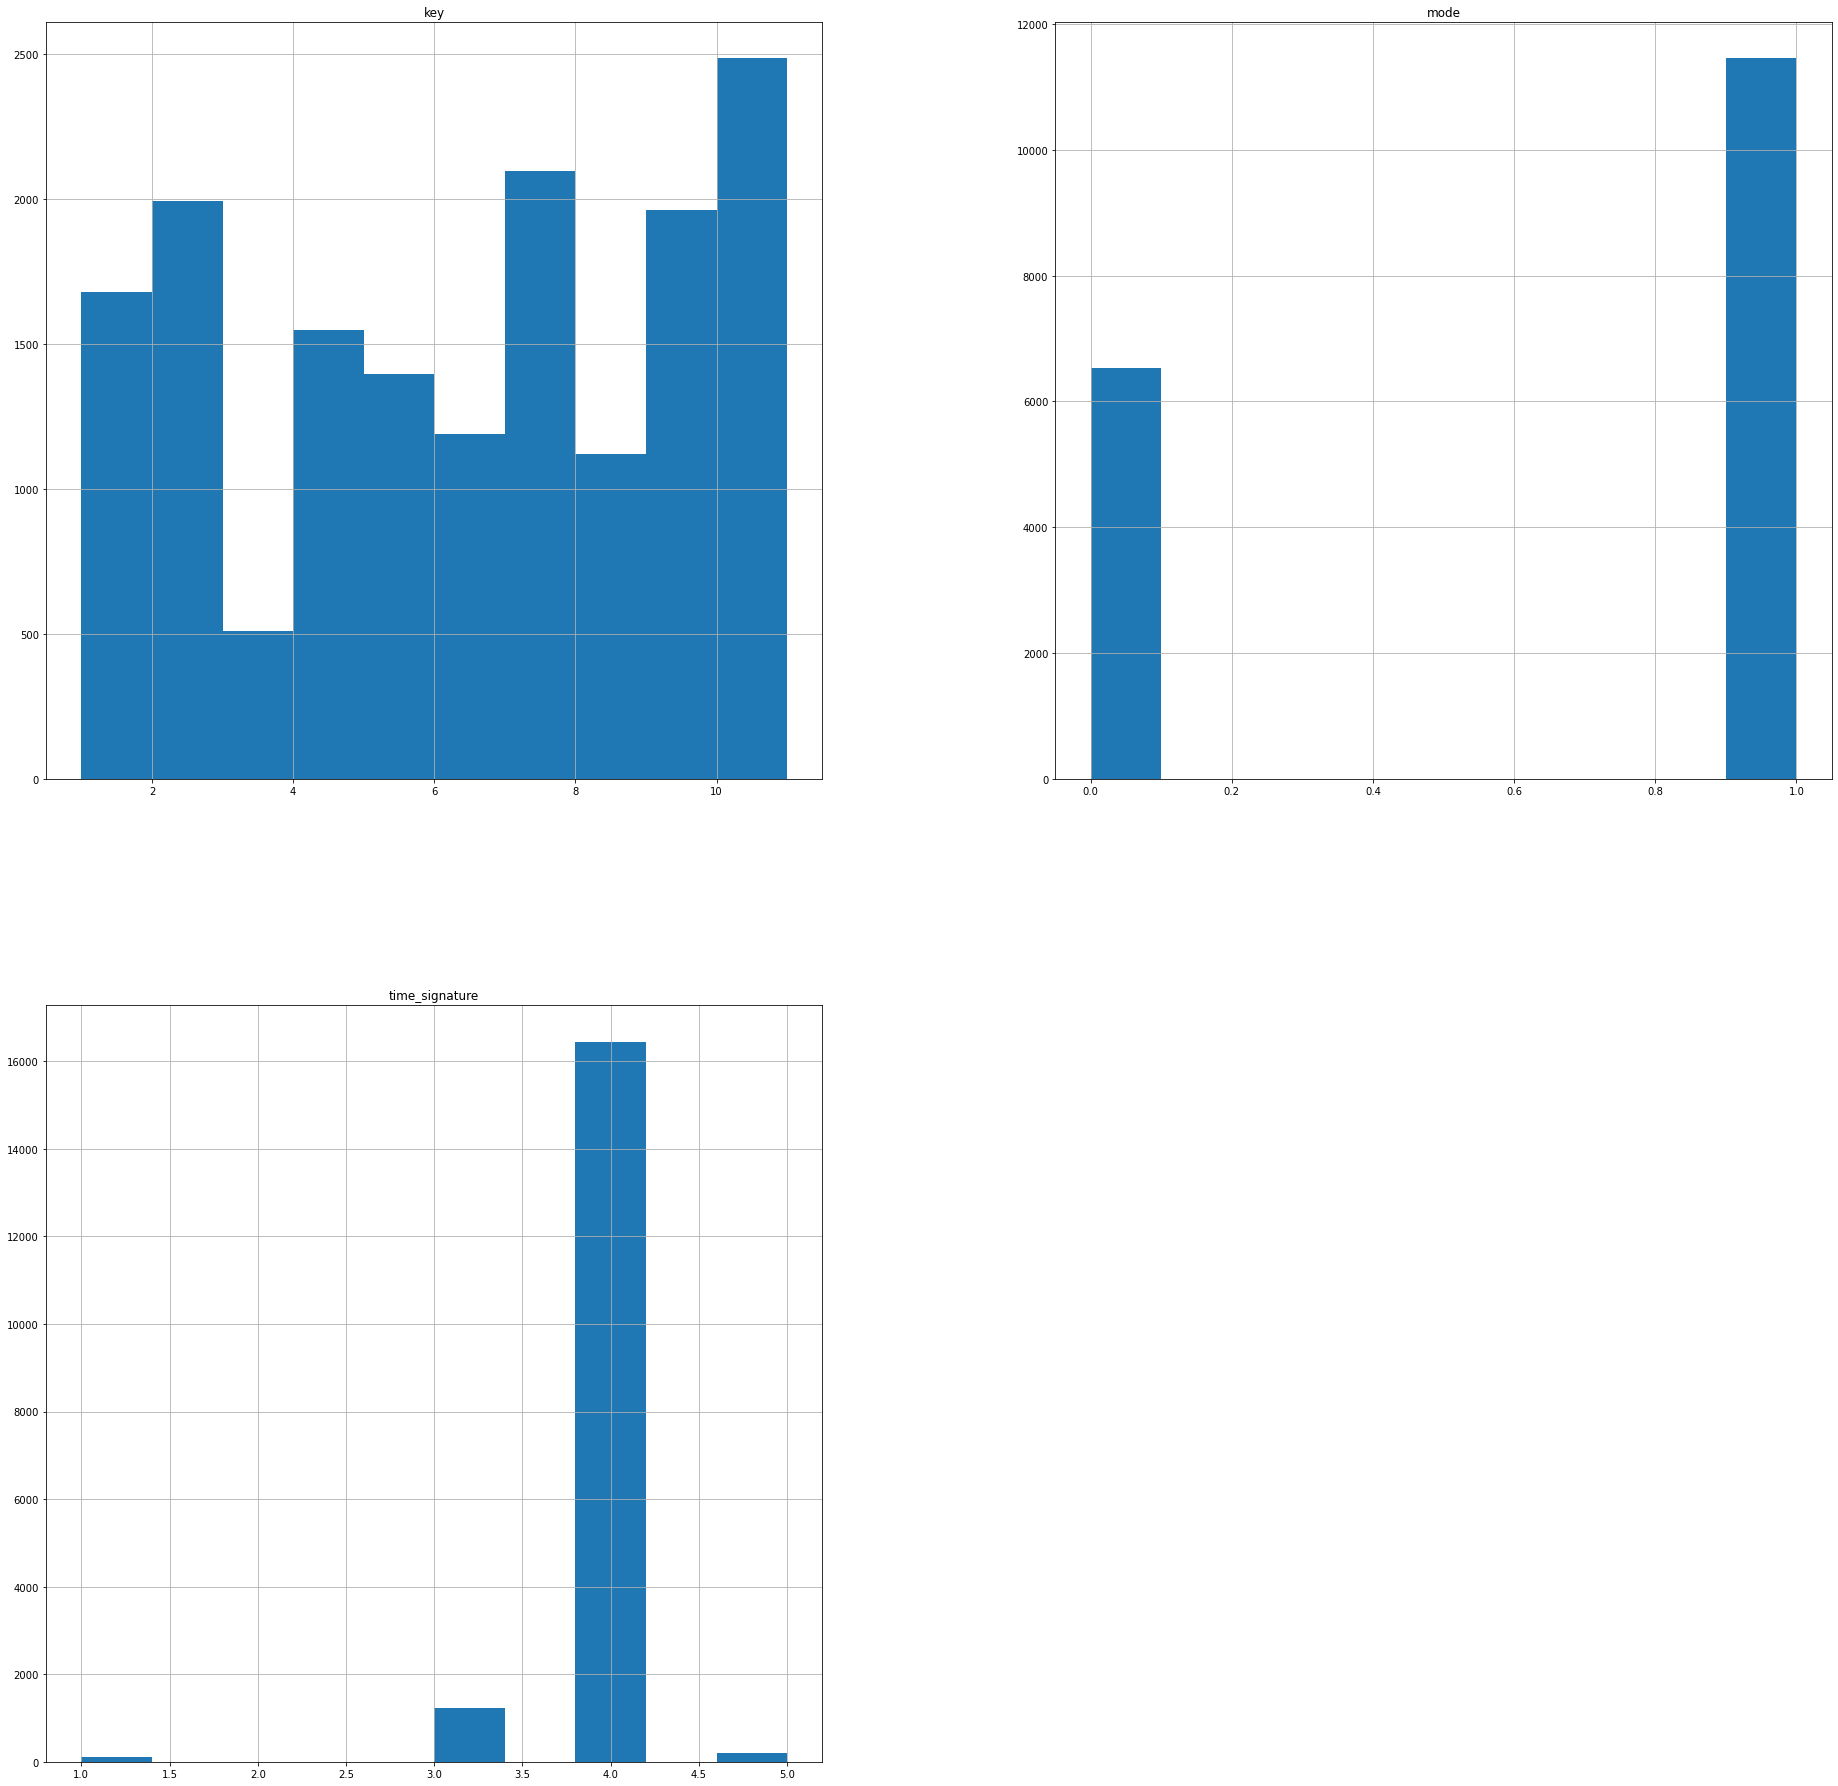

In [10]:
df[categs].hist(figsize=(32, 32));
plt.show();

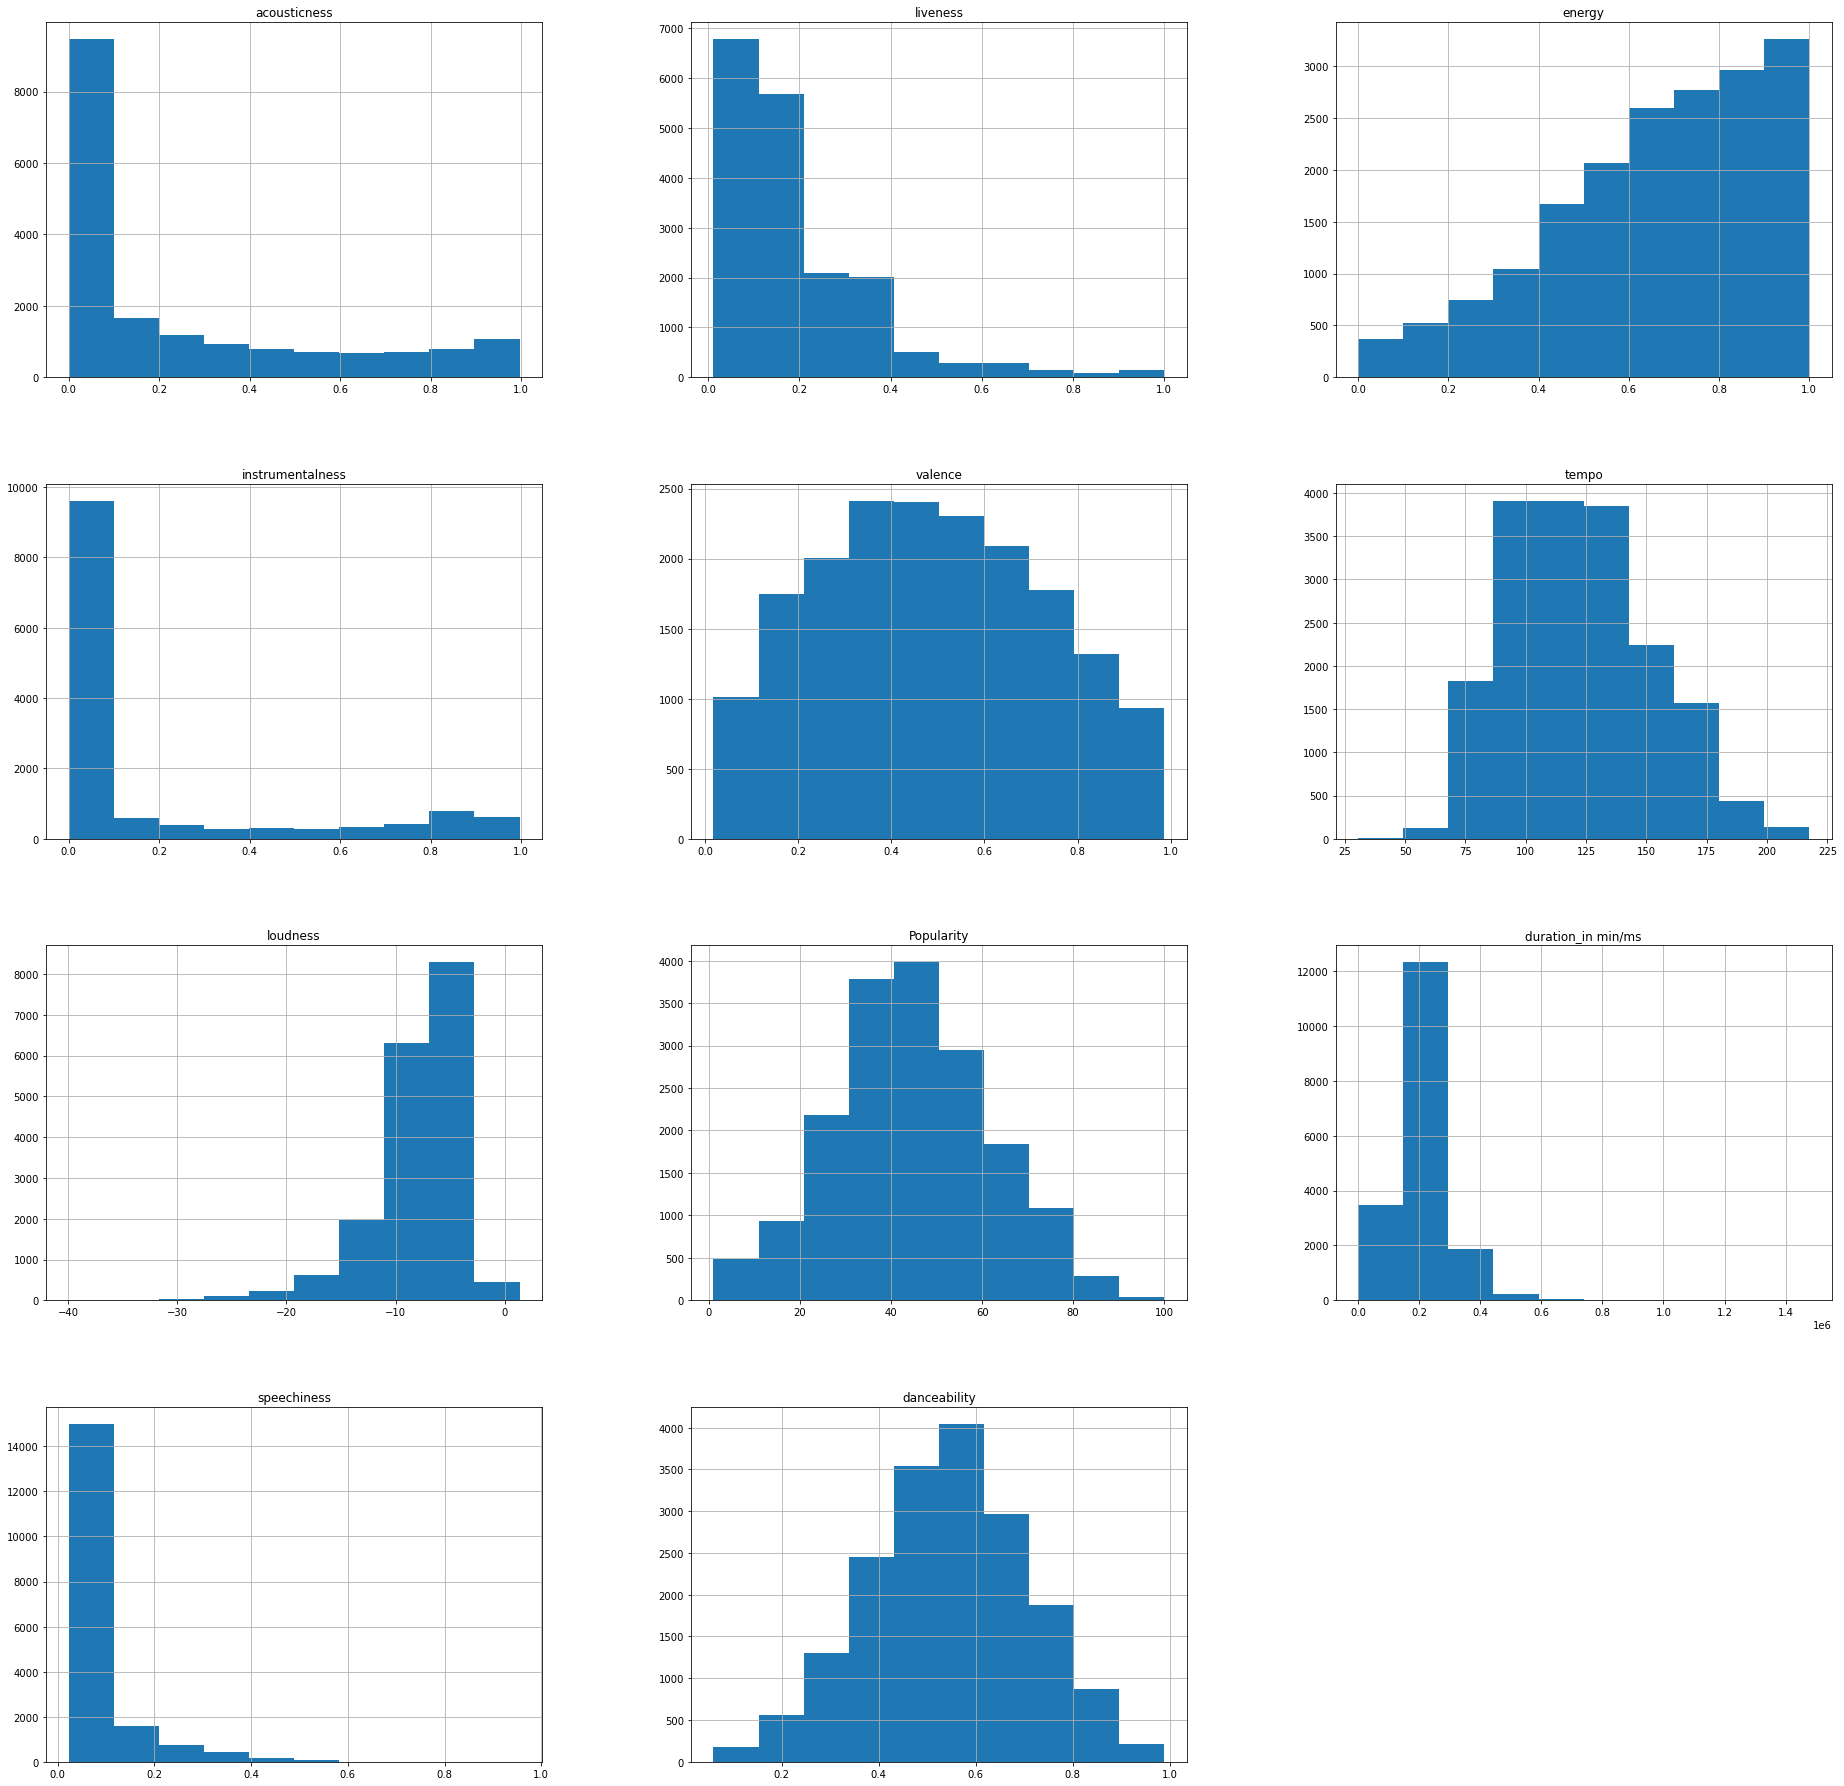

In [11]:
df[numericals].hist(figsize=(32, 32));
plt.show();

`Popularity`, `danceability`, `valence`, and `tempo` have roughly symmetrical distributions. 
Whereas, `loudness`, `acousticness`, `speechiness`, `liveness`, `tempo`, `duration_in min/ms`, `instrumentalness`, and `energy` variables have skewed distributions.

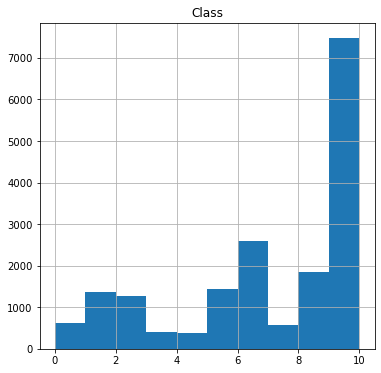

In [12]:
df[y_cols].hist(figsize=(6, 6));
plt.show();

The target variable's distribution is skewed, in other words, our dataset is imbalanced.

### Missing values

Let's see which variables has missing values and how many.

In [13]:
missing_counts = df.isna().sum()
missings = missing_counts[df.columns[missing_counts > 0]]
vars_w_missing = missings.index.values
missings

Popularity           428
key                 2014
instrumentalness    4377
dtype: int64

None of them are categorical variables. We'll fill missing values with mean of variable.

In [14]:
df[vars_w_missing] = df[vars_w_missing].fillna(df[vars_w_missing].mean(axis=0))

Let's verify there is no missing cell left.

In [15]:
(df.isna().sum() == 0).all()

True

Let's adjust `dtype`s of variables.

In [16]:
df = df.astype(float)
df[categs] = df[categs].astype(int).astype("category")
df[y_cols] = df[y_cols].astype(int).astype("category")
df.dtypes

Popularity             float64
danceability           float64
energy                 float64
key                   category
loudness               float64
mode                  category
speechiness            float64
acousticness           float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
duration_in min/ms     float64
time_signature        category
Class                 category
dtype: object

### Train-Test Split

We'll create a stratified train-test split since our dataset is imbalanced. We'll split 20% of the dataset as test set.

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df[x_cols], df[y_cols], 
    test_size=0.2, 
    stratify=df[y_cols].values.ravel(), 
    random_state=42
)

### Normalization, Standardization

We'll standardize the num. variables with symmetrical distributions and min-max normalize the ones with skewed distributions.

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [19]:
sym_cols = ['Popularity', 'danceability', 'valence', 'tempo']
skewed_cols = [ 'loudness', 'acousticness', 'speechiness', 'liveness', 'tempo', 'duration_in min/ms', 'instrumentalness', 'energy']

In [20]:
x_train_proc = x_train.copy()
x_test_proc = x_test.copy()

In [21]:
standardize = StandardScaler()
x_train_proc.loc[:, sym_cols] = standardize.fit_transform(x_train.loc[:, sym_cols])
x_test_proc.loc[:, sym_cols] = standardize.transform(x_test.loc[:, sym_cols])

In [22]:
normalizer = MinMaxScaler()
x_train_proc.loc[:, skewed_cols] = normalizer.fit_transform(x_train.loc[:, skewed_cols])
x_test_proc.loc[:, skewed_cols] = normalizer.transform(x_test.loc[:, skewed_cols])

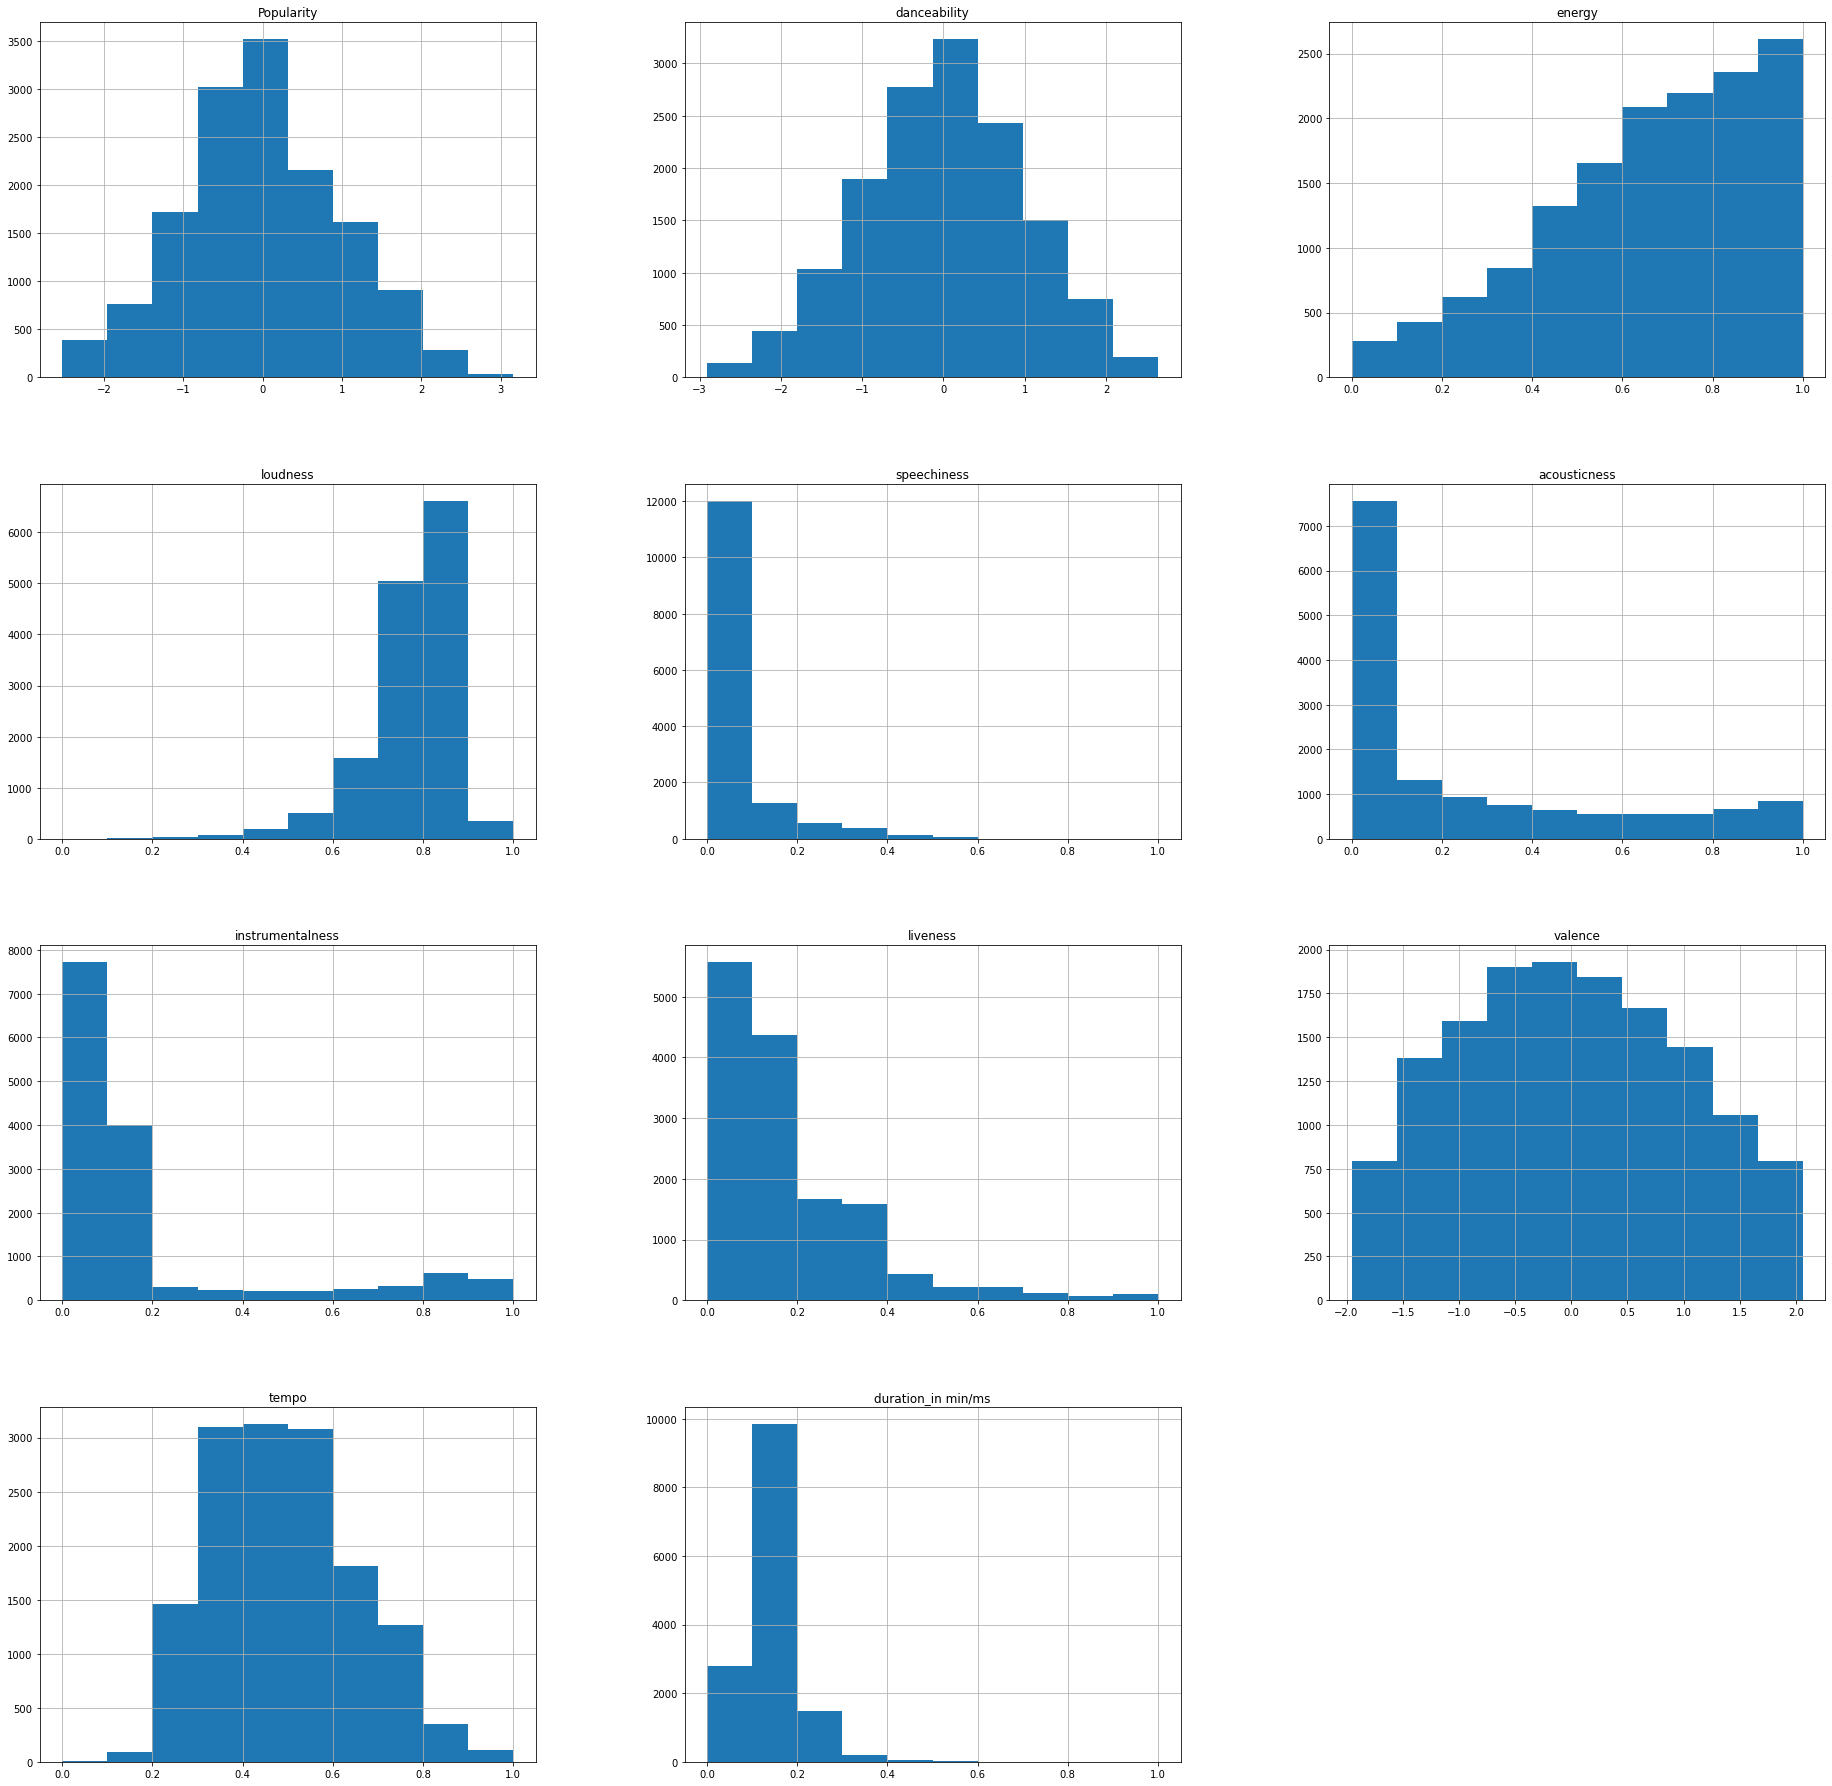

In [23]:
x_train_proc.hist(figsize=(32, 32));
plt.show();

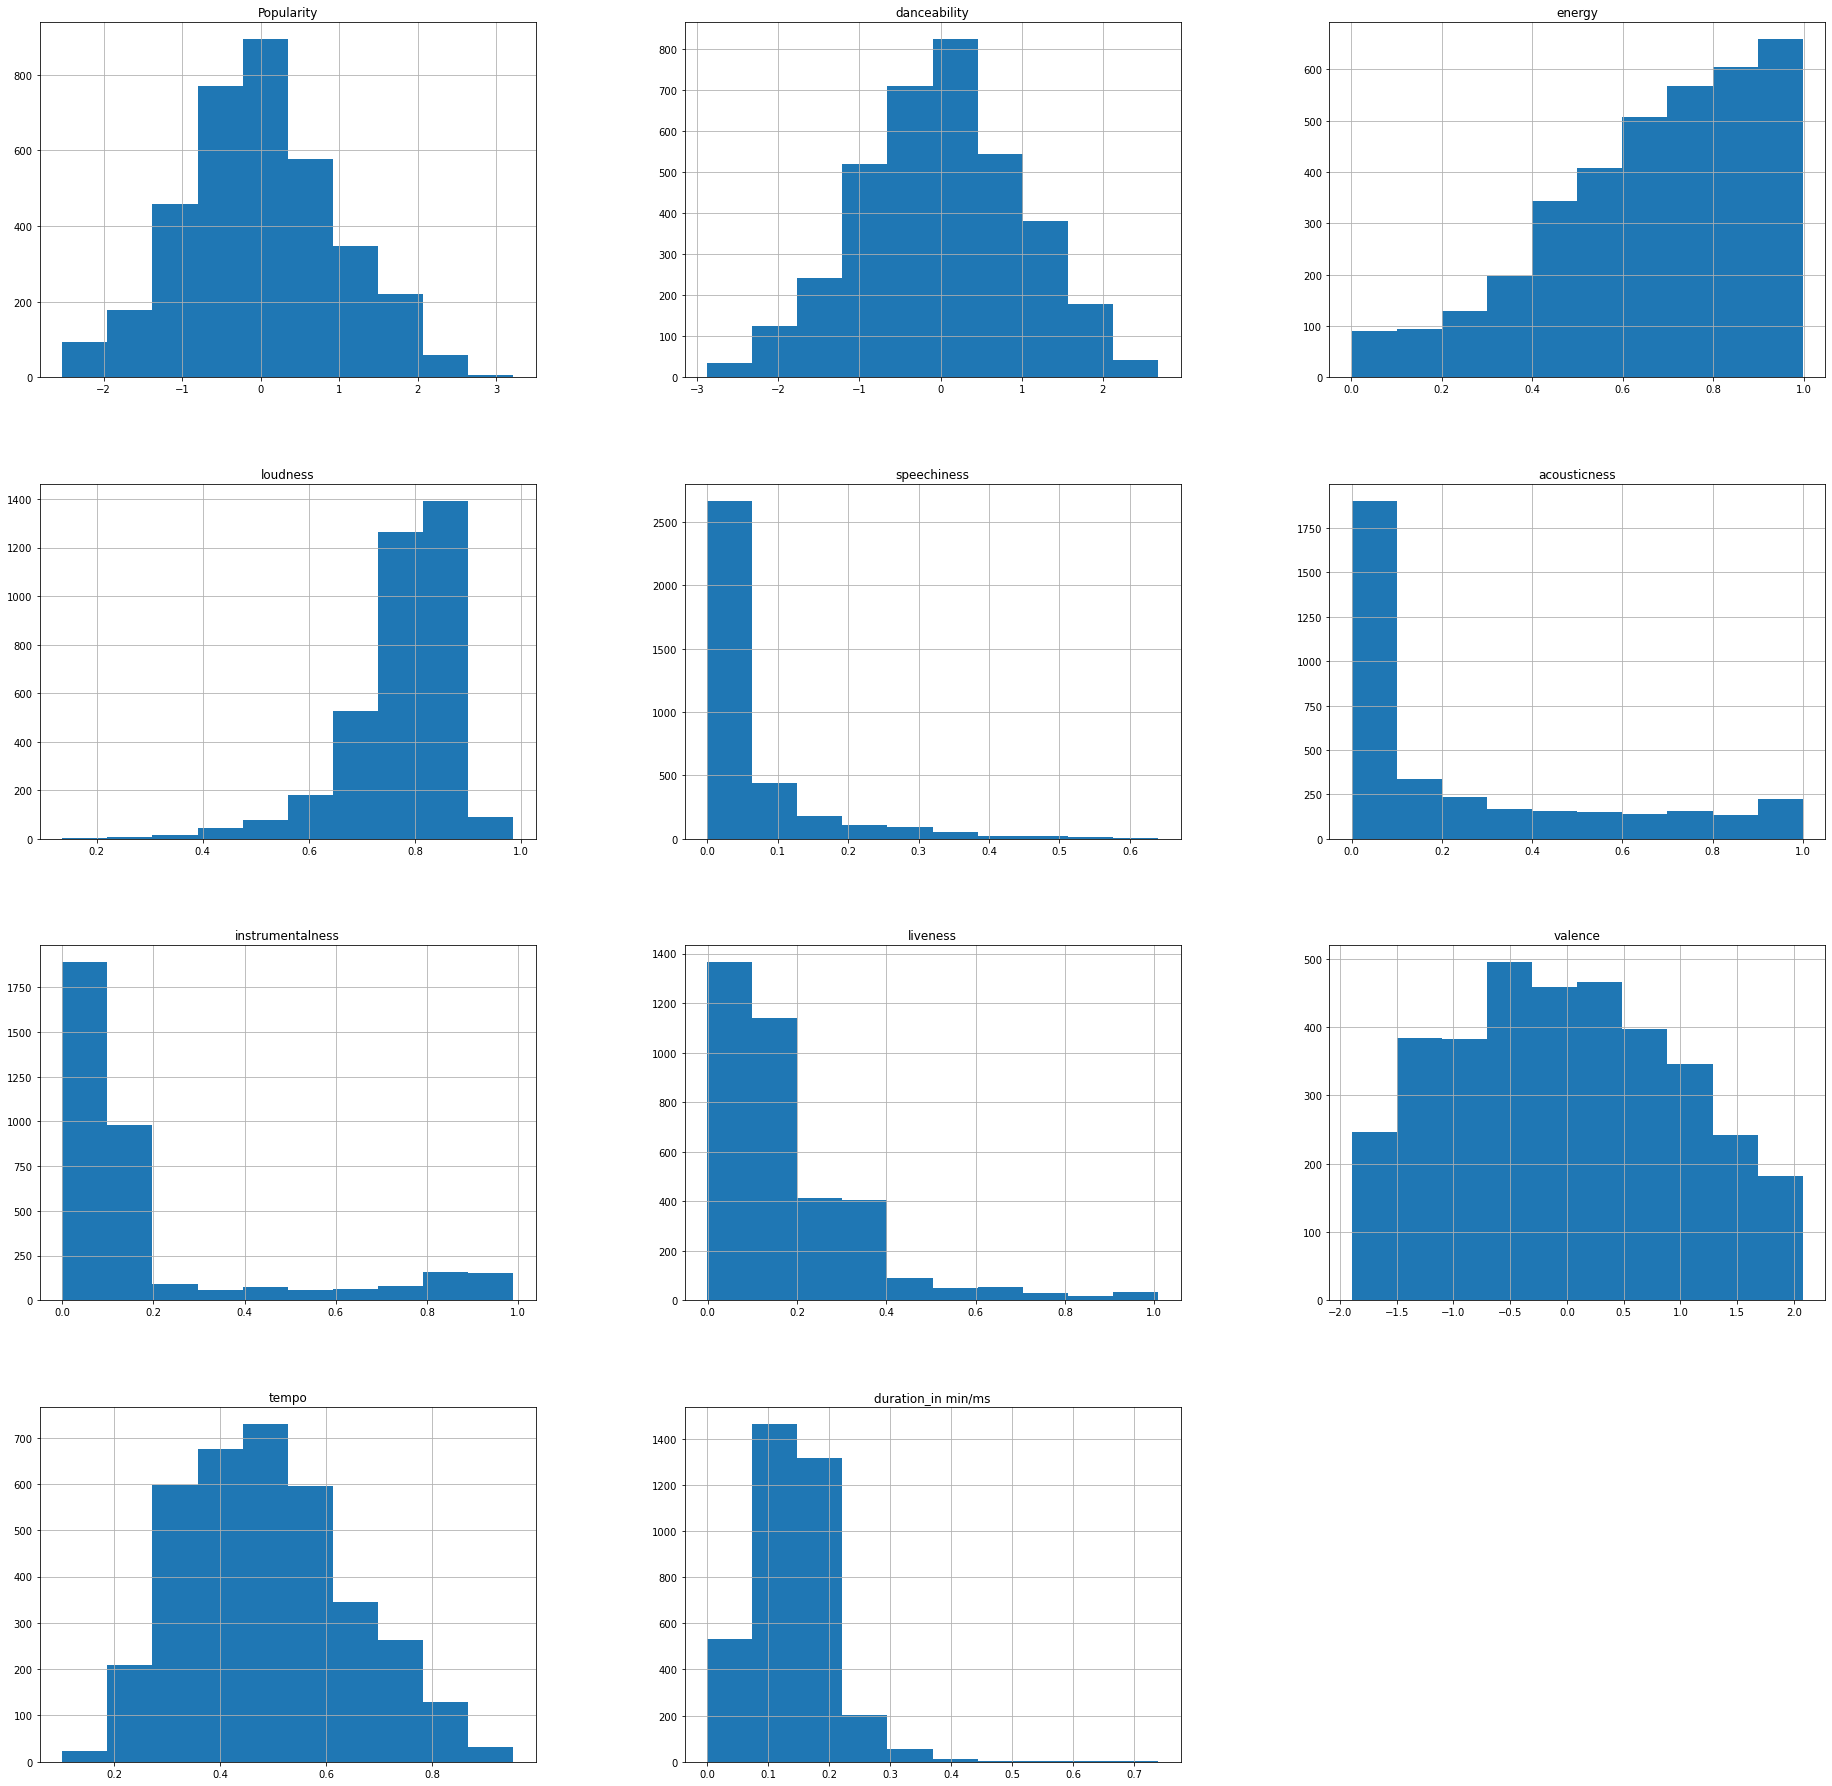

In [24]:
x_test_proc.hist(figsize=(32, 32));
plt.show();

### Encoding categorical variables

We'll one-hot encode categorical input variables.

In [25]:
x_train_proc.describe()

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
count,1.439600e+04,1.439600e+04,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,5.607027e-17,2.751650e-17,0.662236,0.775722,0.061037,0.248499,0.176717,0.186852,-9.868306e-17,0.493366,0.135602
std,1.000035e+00,1.000035e+00,0.235318,0.097654,0.089503,0.311814,0.264480,0.162507,1.000035e+00,0.158587,0.075607
min,-2.526934e+00,-2.908886e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.952971e+00,0.000000,0.000000
25%,-6.713977e-01,-6.692304e-01,0.507990,0.736794,0.013083,0.004297,0.000294,0.085650,-7.880894e-01,0.369978,0.112375
50%,-3.355695e-02,1.637860e-02,0.698994,0.796984,0.026702,0.082631,0.047740,0.117948,-2.177444e-02,0.479736,0.141490
75%,6.622693e-01,6.959735e-01,0.860997,0.841607,0.064236,0.433735,0.178274,0.250818,7.736938e-01,0.596462,0.170777
max,3.155647e+00,2.638532e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.060603e+00,1.000000,1.000000


In [26]:
x_train_enc = pd.get_dummies(x_train_proc)
x_test_enc = pd.get_dummies(x_test_proc)

### Train & Evaluate

We'll train 

- DecisionTreeClassifier with min number of samples at leaves [3, 10]
- KNeighborsClassifier with number of neighbors [5, 10]
- LogisticRegression with inverse regularization strength `C` [1, 1.5]
 
with 5 fold cross validation. Then, we'll compare `precision`, `recall` and `accuracy` scores.
    

We'll use `GridSearchCV` from `scikit-learn` library to train our model with 5-fold cross validation and different hyper parameters.

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score

def make_searcher(estimator, param_grid, cv=5, score_averaging = 'weighted', seed=42):
    return GridSearchCV(
        estimator = estimator, 
        param_grid = param_grid,
        scoring = {
            'precision': make_scorer(precision_score, average=score_averaging), 
            'recall': make_scorer(recall_score, average=score_averaging),
            'accuracy': 'accuracy'
        }, 
        refit = 'accuracy',
        cv = cv, # number of folds for cross validation
        verbose=0, 
        n_jobs = -1
    )

In [28]:
import json

def fmt_search_results(search):
    sdf = pd.DataFrame(search.cv_results_)
    cols2keep = [col for col in sdf.columns if col=='params' or col.startswith('split')]
    sdf = sdf[cols2keep]
    sdf.columns = pd.MultiIndex.from_tuples([(np.nan, col) if col=='params' else (col[:6], col[12:]) for col in sdf.columns])
    sdf = (sdf.stack(0)
       .ffill()
       .reset_index()
       .drop(columns=['level_0'])
       .dropna(how='any', axis=0)
       .rename(columns={"level_1": "split"})
      )
    
    sdf['estimator'] = search.estimator.__class__.__name__
    return sdf[['estimator', 'params', 'split', 'accuracy', 'precision', 'recall']]

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

model_param_grids = [
    (DecisionTreeClassifier(), dict(min_samples_leaf = [3, 10])),
    (KNeighborsClassifier(), dict(n_neighbors = [5, 10])),
    (LogisticRegression(max_iter=1000), dict(C=[1, 1.5]))
]

sdf = pd.concat([
    fmt_search_results(make_searcher(estim, pg).fit(x_train_enc, y_train.values.ravel())) 
    for (estim, pg) in model_param_grids
])

/Users/bdsaglam/miniconda3/envs/di501/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bdsaglam/miniconda3/envs/di501/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bdsaglam/miniconda3/envs/di501/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bdsaglam/miniconda

In [30]:
sdf.sort_values(by='accuracy', ascending=False)

,estimator,params,split,accuracy,precision,recall
11,LogisticRegression,{'C': 1.5},split4,0.486627,0.456088,0.486627
9,LogisticRegression,{'C': 1.5},split2,0.485933,0.453468,0.485933
5,LogisticRegression,{'C': 1},split4,0.485933,0.454998,0.485933
10,LogisticRegression,{'C': 1.5},split3,0.485238,0.449026,0.485238
7,LogisticRegression,{'C': 1.5},split0,0.484028,0.451209,0.484028
4,LogisticRegression,{'C': 1},split3,0.482459,0.448118,0.482459
1,LogisticRegression,{'C': 1},split0,0.479861,0.448046,0.479861
3,LogisticRegression,{'C': 1},split2,0.479680,0.447287,0.479680
8,LogisticRegression,{'C': 1.5},split1,0.476902,0.450427,0.476902
2,LogisticRegression,{'C': 1},split1,0.474470,0.447224,0.474470


As it can be seen from the table above, `LogisticRegression` with `C=1.5` performs best. Let's check the average of scores over splits.

In [31]:
def average_over_splits(sdf):
    return (sdf.assign(params=lambda x: x['params'].apply(str))
            .groupby(['estimator', 'params'])
            .agg(np.mean)
            .sort_values(by='accuracy', ascending=False))

In [32]:
average_over_splits(sdf)

accuracy  precision    recall
estimator              params                                                 
LogisticRegression     {'C': 1.5}                0.483745   0.452044  0.483745
                       {'C': 1}                  0.480481   0.449135  0.480481
DecisionTreeClassifier {'min_samples_leaf': 10}  0.436719   0.427774  0.436719
                       {'min_samples_leaf': 3}   0.383926   0.391476  0.383926
KNeighborsClassifier   {'n_neighbors': 10}       0.343985   0.326762  0.343985
                       {'n_neighbors': 5}        0.307030   0.306784  0.307030

In [33]:
m = LogisticRegression(C=1.5, max_iter=1000)
m.fit(x_train_enc.values, y_train.values.ravel())

LogisticRegression(C=1.5, max_iter=1000)

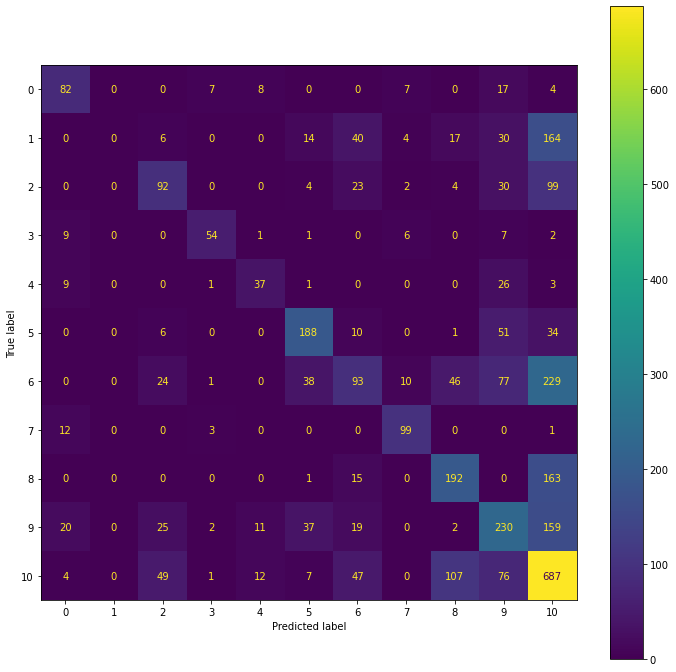

              precision    recall  f1-score   support

           0       0.60      0.66      0.63       125
           1       0.00      0.00      0.00       275
           2       0.46      0.36      0.40       254
           3       0.78      0.68      0.72        80
           4       0.54      0.48      0.51        77
           5       0.65      0.65      0.65       290
           6       0.38      0.18      0.24       518
           7       0.77      0.86      0.81       115
           8       0.52      0.52      0.52       371
           9       0.42      0.46      0.44       505
          10       0.44      0.69      0.54       990

    accuracy                           0.49      3600
   macro avg       0.51      0.50      0.50      3600
weighted avg       0.45      0.49      0.45      3600



/Users/bdsaglam/miniconda3/envs/di501/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bdsaglam/miniconda3/envs/di501/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bdsaglam/miniconda3/envs/di501/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred = m.predict(x_test_enc.values)
cm = confusion_matrix(y_test.values.ravel(), y_pred, labels=m.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=m.classes_)
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax)
plt.show()
print(classification_report(y_test, y_pred))

<h3 style="margin-bottom:0">3) PCA</h3>

For the following use mushroom data.

    a) Apply PCA to feature columns (x1..x40) and find the principal components.
    b) Plot explained variance ratios for the principal components.
    c) Determine the most appropriate number of principal components to represent the features in a lower dimensional space while preserving as much information as possible.
    d) Apply the two best performing algorithms above on the new dataset that is created by PCA. Did your algorithm's accuracy improve? Comment.

Let's apply PCA over numerical variables.

In [35]:
from sklearn.decomposition import PCA

pca = PCA()
x_train_nums_pca = pca.fit_transform(x_train_proc[numericals].values)

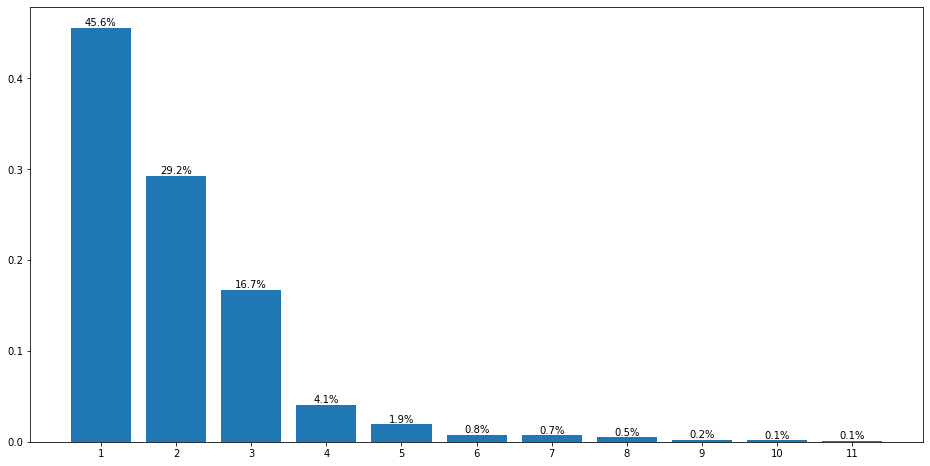

In [36]:
icomps = range(1, x_train_nums_pca.shape[-1]+1)
vrs = pca.explained_variance_ratio_

plt.figure(figsize=(16, 8))
plt.bar(icomps, vrs)
plt.xticks(icomps)
for icomp, vr in zip(icomps, vrs):
    plt.annotate(f'{vr:.1%}', xy=(icomp, vr), ha='center', va='bottom')

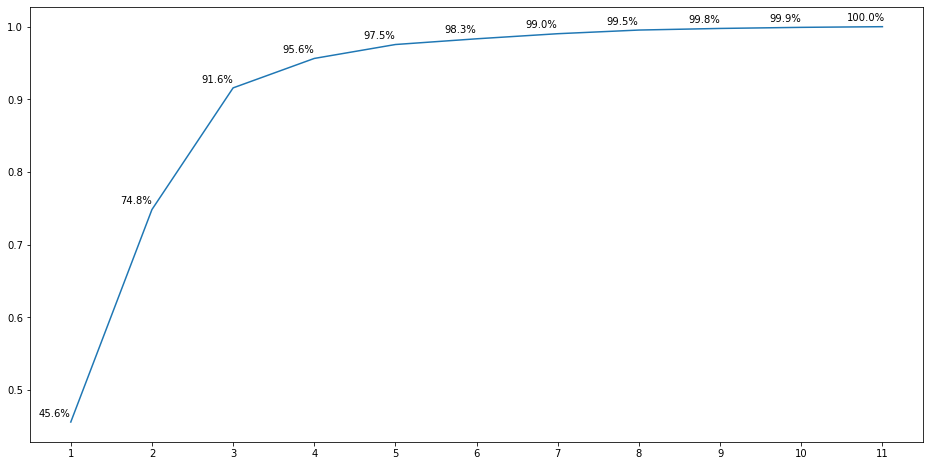

In [37]:
cvrs = np.cumsum(vrs)

plt.figure(figsize=(16, 8))
plt.plot(icomps, cvrs)
plt.xticks(icomps)
for icomp, vr in zip(icomps, cvrs):
    plt.annotate(f'{vr:.1%}', xy=(icomp-0.2, vr+0.005), ha='center', va='bottom')

4 components covers ~95.6% of variance in the training set, hence, we'll keep those.

In [38]:
k = 4

In [39]:
x_train_after_pca_reduction = np.hstack([x_train_nums_pca[:, :k], pd.get_dummies(x_train_proc[categs]).values])

x_test_nums_pca = pca.transform(x_test_proc[numericals].values)
x_test_after_pca_reduction = np.hstack([x_test_nums_pca[:, :k], pd.get_dummies(x_test_proc[categs]).values])

Let's train models with this reduced dataset.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

model_param_grids = [
    (DecisionTreeClassifier(), dict(min_samples_leaf = [10])),
    (LogisticRegression(max_iter=1000), dict(C=[1.5]))
]

sdf = pd.concat([
    fmt_search_results(make_searcher(estim, pg).fit(x_train_after_pca_reduction, y_train.values.ravel())) 
    for (estim, pg) in model_param_grids
])

/Users/bdsaglam/miniconda3/envs/di501/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bdsaglam/miniconda3/envs/di501/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bdsaglam/miniconda3/envs/di501/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bdsaglam/miniconda

In [41]:
sdf.sort_values(by='accuracy', ascending=False)

,estimator,params,split,accuracy,precision,recall
1,LogisticRegression,{'C': 1.5},split0,0.391667,0.332849,0.391667
2,LogisticRegression,{'C': 1.5},split1,0.389371,0.327198,0.389371
3,LogisticRegression,{'C': 1.5},split2,0.387982,0.324494,0.387982
4,LogisticRegression,{'C': 1.5},split3,0.383814,0.329013,0.383814
5,LogisticRegression,{'C': 1.5},split4,0.382772,0.331550,0.382772
2,DecisionTreeClassifier,{'min_samples_leaf': 10},split1,0.314693,0.299691,0.314693
4,DecisionTreeClassifier,{'min_samples_leaf': 10},split3,0.313998,0.305919,0.313998
3,DecisionTreeClassifier,{'min_samples_leaf': 10},split2,0.313303,0.299486,0.313303
1,DecisionTreeClassifier,{'min_samples_leaf': 10},split0,0.311111,0.298425,0.311111
5,DecisionTreeClassifier,{'min_samples_leaf': 10},split4,0.303578,0.295901,0.303578


In [42]:
sdf.assign(params=lambda x: x['params'].apply(str)).groupby(['estimator', 'params']).agg(np.mean).sort_values(by='accuracy', ascending=False)

,,accuracy,precision,recall
estimator,params,,,
LogisticRegression,{'C': 1.5},0.387121,0.329021,0.387121
DecisionTreeClassifier,{'min_samples_leaf': 10},0.311336,0.299885,0.311336


The classification scores dropped with reduced dataset for both algorithms.

### Bonus - Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

def rf(xs, y, n_estimators=40, max_features=0.5, min_samples_leaf=5, oob_score=True, **kwargs):
    m = RandomForestClassifier(
        n_jobs=-1, 
        n_estimators=n_estimators,
        max_features=max_features,
        min_samples_leaf=min_samples_leaf, 
        oob_score=True
    )
    return m.fit(xs, y)

In [44]:
m = rf(x_train_proc.values, y_train.values.ravel())
print(m.score(x_train_proc.values, y_train.values.ravel()))
print(m.score(x_test_proc.values, y_test.values.ravel()))

0.797304806890803
0.5083333333333333


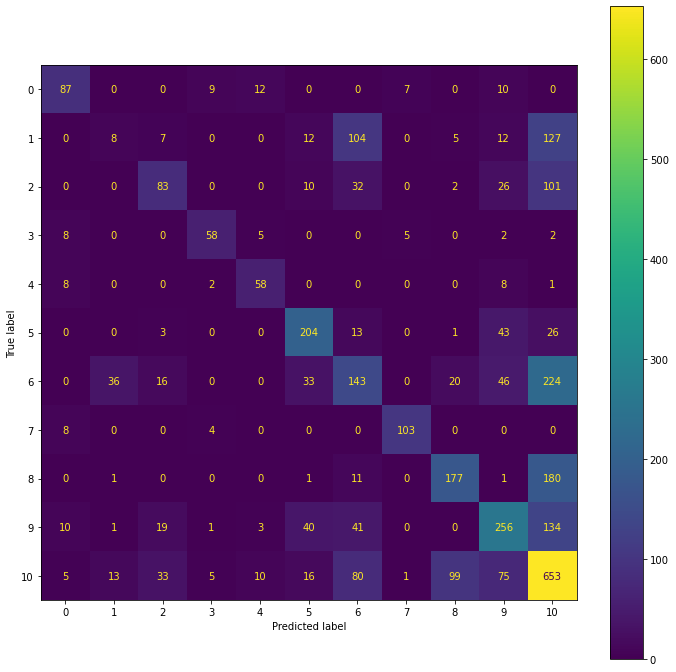

              precision    recall  f1-score   support

           0       0.69      0.70      0.69       125
           1       0.14      0.03      0.05       275
           2       0.52      0.33      0.40       254
           3       0.73      0.72      0.73        80
           4       0.66      0.75      0.70        77
           5       0.65      0.70      0.67       290
           6       0.34      0.28      0.30       518
           7       0.89      0.90      0.89       115
           8       0.58      0.48      0.52       371
           9       0.53      0.51      0.52       505
          10       0.45      0.66      0.54       990

    accuracy                           0.51      3600
   macro avg       0.56      0.55      0.55      3600
weighted avg       0.49      0.51      0.49      3600



In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = m.predict(x_test_proc.values)

cm = confusion_matrix(y_test.values.ravel(), y_pred, labels=m.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=m.classes_)
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax)
plt.show()
print(classification_report(y_test, y_pred))